In [2]:
from numpy import *
from scipy import signal
from pylab import *
import string

from datetime import date
import imp
AgilentSCPI=imp.load_source('AgilentSCPI','c:/Users/Jacob/Nonlinearity/Codes/AgilentSCPI.py')
import time
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
plt.rcParams["font.family"] = "Times New Roman"
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
from IPython.display import HTML
from IPython.display import Image
import csv
import os
import decimal
print(time.ctime())

Fri Feb  5 15:56:25 2021


C:\Users\Jacob\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  app.launch_new_instance()


In [3]:
pathbase='c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/'
Folder_Name = os.listdir(pathbase)
print(Folder_Name)
%run c:/Users/Jacob/Nonlinearity/Codes/ComputeDelays.py
FILE_NAME = '10.0V'

delaystep=1
start=0
stop=99
delay_scale_fact=1 #If you've named the files with some scaling factor so ppX.csv is for delay x/10 then set 
    #                   the scale factor to 10
start_name=1
print(time.ctime())

['.DS_Store', '10.0V']
Fri Feb  5 15:56:25 2021


In [4]:
class timedata:

    def __init__(self, name):
        self.name = name
        self.time = np.array    # creates a new empty list
        self.data = np.array    # creates a new empty list

print(time.ctime())

Fri Feb  5 15:56:25 2021


In [5]:
def readlabdat(fname,dataset):
# read in data from the scope and make a matrix of values from it
    
    f = open(fname,'r')
    header1=f.readline()
    header2=f.readline()
    header3=f.readline()
    header4=f.readline()
 
    tmp1=[]
    tmp2=[]
    
    for line in f:

        columns = line.split(',')
        tmp1.append(float(columns[0]))
        tmp2.append(float(columns[1]))
    
    Directory_=fname
    print(Directory_)
    dataset.time=np.asarray(tmp1)
    dataset.data=np.asarray(tmp2)
    f.close()
    
print(time.ctime()) 

Fri Feb  5 15:56:26 2021


## Calculating Time Delays From Transmission Delay Data

0
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr0.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp0.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu0.csv


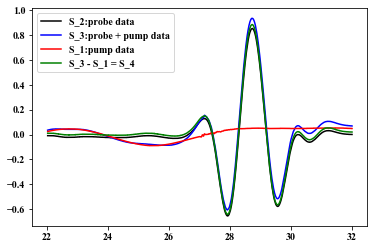

1
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr1.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp1.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu1.csv


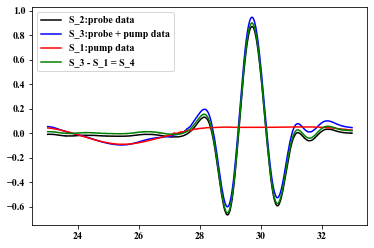

2
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr2.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp2.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu2.csv


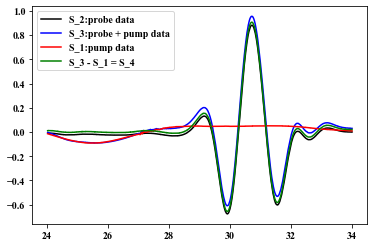

3
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr3.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp3.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu3.csv


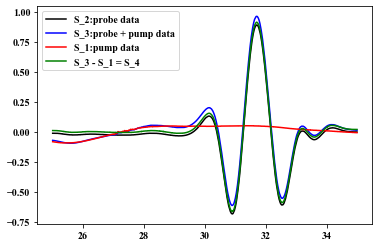

4
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr4.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp4.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu4.csv


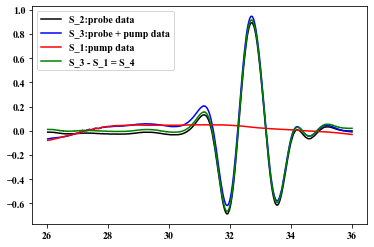

5
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr5.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp5.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu5.csv


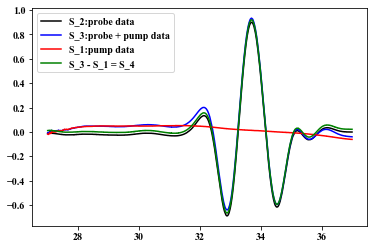

6
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr6.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp6.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu6.csv


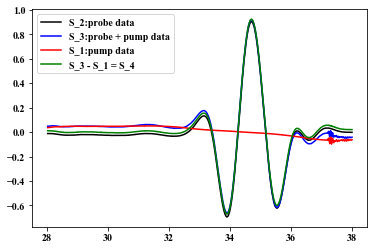

7
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr7.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp7.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu7.csv


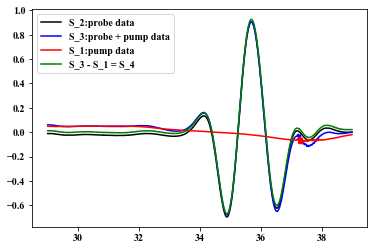

8
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr8.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp8.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu8.csv


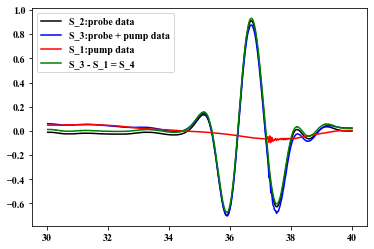

9
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr9.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp9.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu9.csv


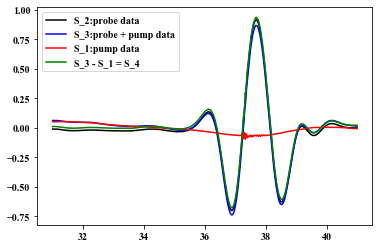

10
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr10.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp10.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu10.csv


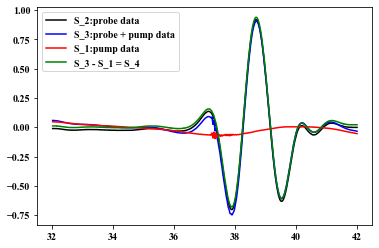

11
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr11.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp11.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu11.csv


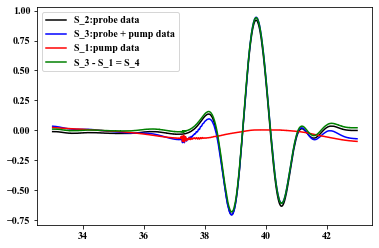

12
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr12.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp12.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu12.csv


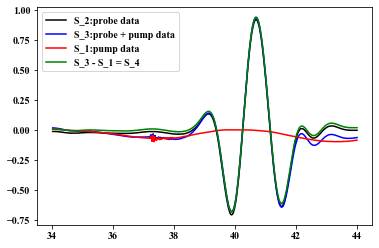

13
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr13.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp13.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu13.csv


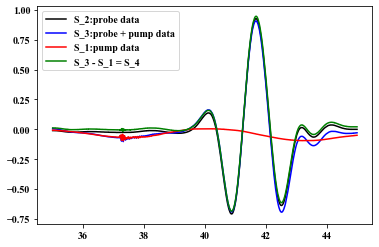

14
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr14.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp14.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu14.csv


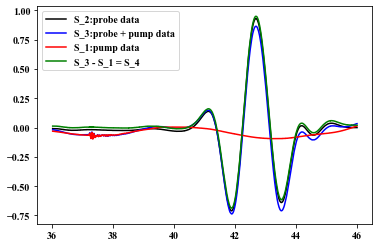

15
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr15.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp15.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu15.csv


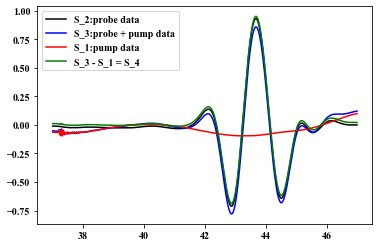

16
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr16.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp16.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu16.csv


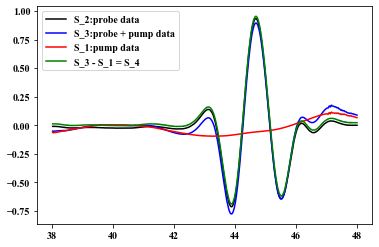

17
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr17.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp17.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu17.csv


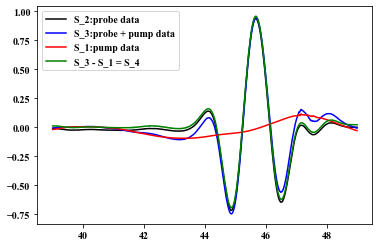

18
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr18.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp18.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu18.csv


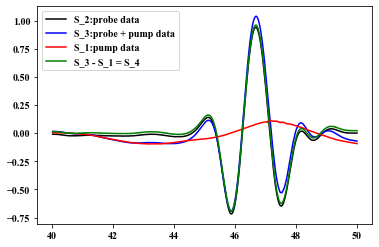

19
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr19.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp19.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu19.csv


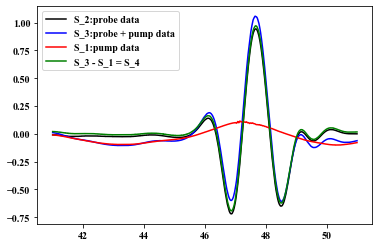

20
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr20.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp20.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu20.csv


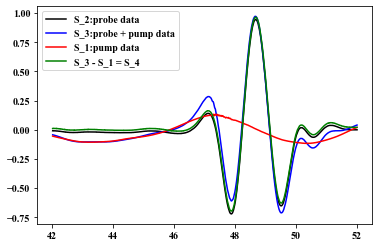

21
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr21.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp21.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu21.csv


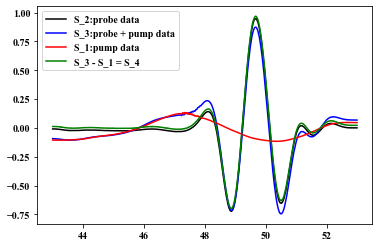

22
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr22.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp22.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu22.csv


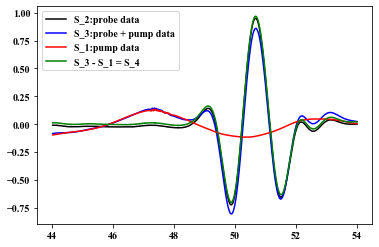

23
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr23.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp23.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu23.csv


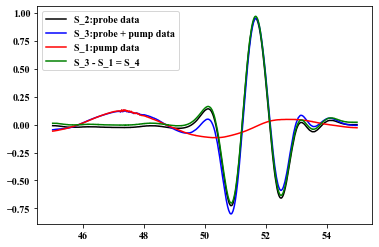

24
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr24.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp24.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu24.csv


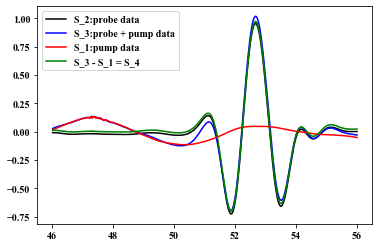

25
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr25.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp25.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu25.csv


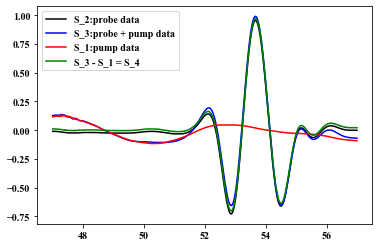

26
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr26.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp26.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu26.csv


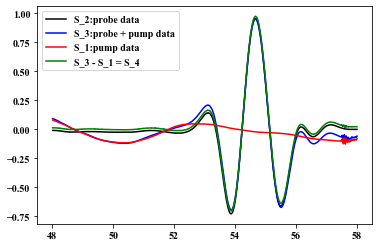

27
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr27.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp27.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu27.csv


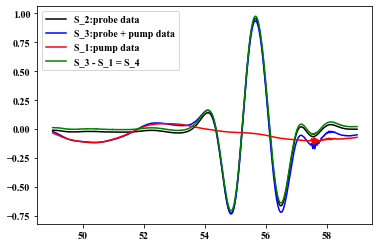

28
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr28.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp28.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu28.csv


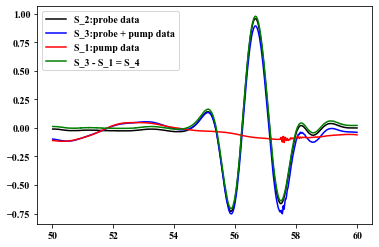

29
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr29.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp29.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu29.csv


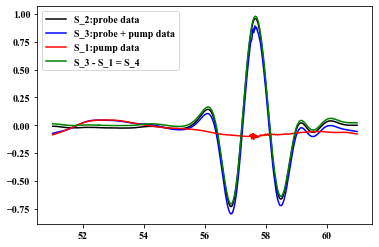

30
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr30.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp30.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu30.csv


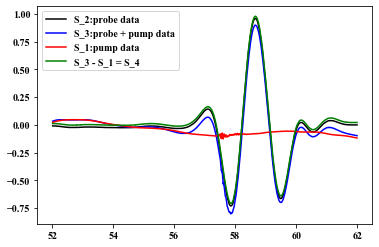

31
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr31.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp31.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu31.csv


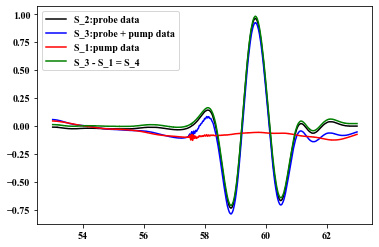

32
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr32.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp32.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu32.csv


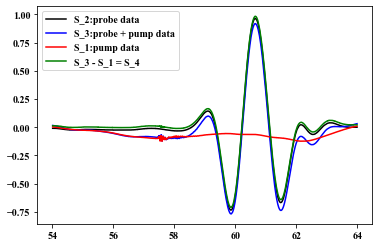

33
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr33.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp33.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu33.csv


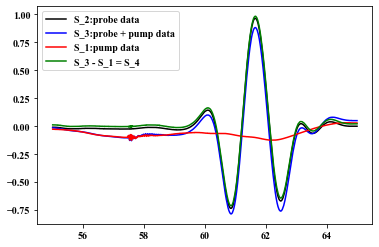

34
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr34.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp34.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu34.csv


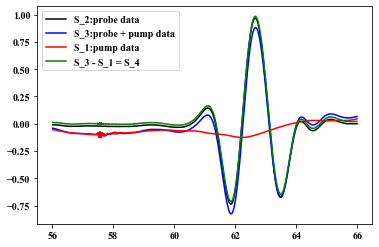

35
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr35.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp35.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu35.csv


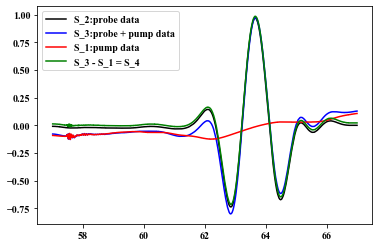

36
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr36.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp36.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu36.csv


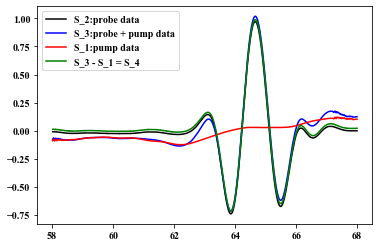

37
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr37.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp37.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu37.csv


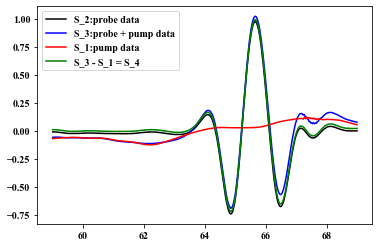

38
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr38.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp38.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu38.csv


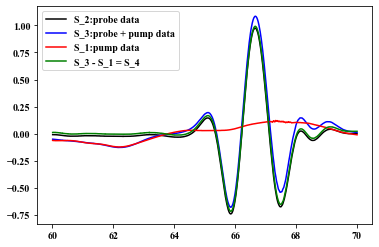

39
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr39.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp39.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu39.csv


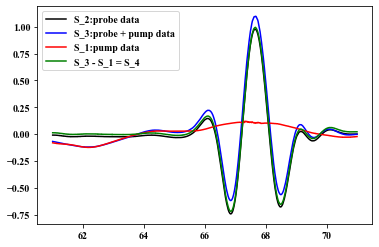

40
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr40.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp40.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu40.csv


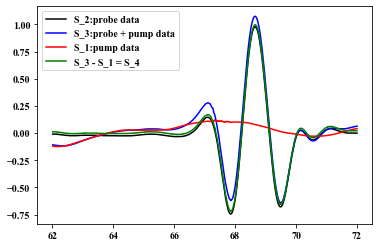

41
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr41.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp41.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu41.csv


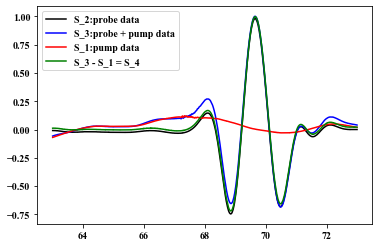

42
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr42.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp42.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu42.csv


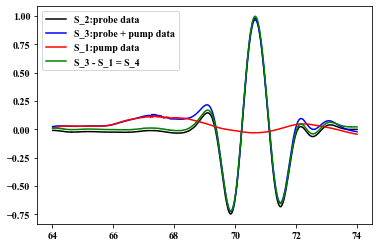

43
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr43.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp43.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu43.csv


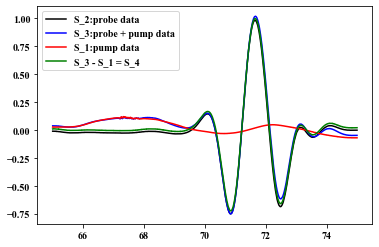

44
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr44.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp44.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu44.csv


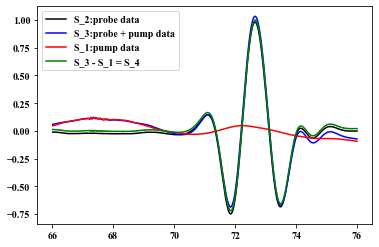

45
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr45.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp45.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu45.csv


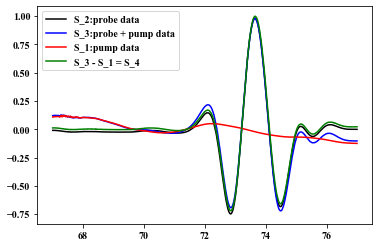

46
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr46.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp46.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu46.csv


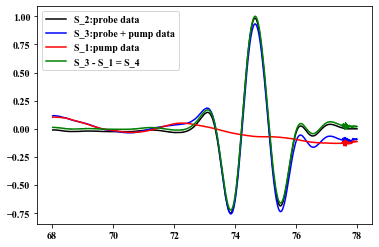

47
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr47.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp47.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu47.csv


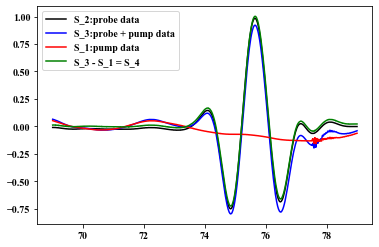

48
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr48.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp48.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu48.csv


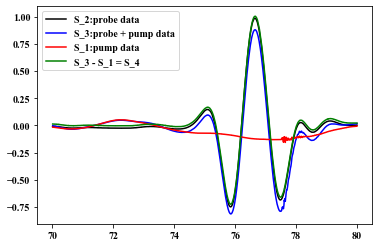

49
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr49.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp49.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu49.csv


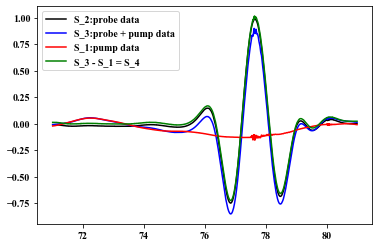

50
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr50.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp50.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu50.csv


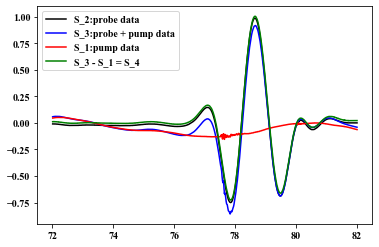

51
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr51.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp51.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu51.csv


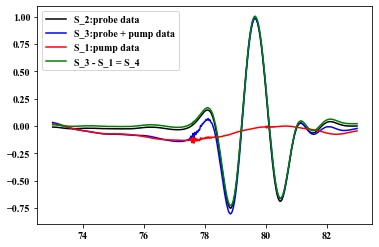

52
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr52.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp52.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu52.csv


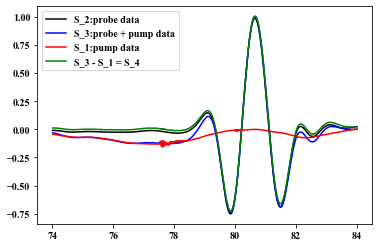

53
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr53.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp53.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu53.csv


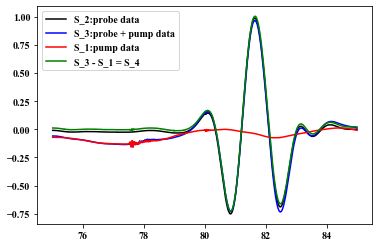

54
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr54.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp54.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu54.csv


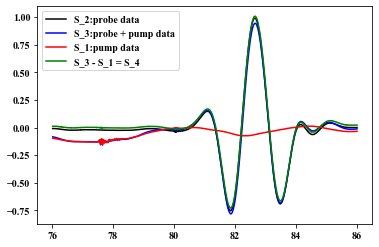

55
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr55.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp55.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu55.csv


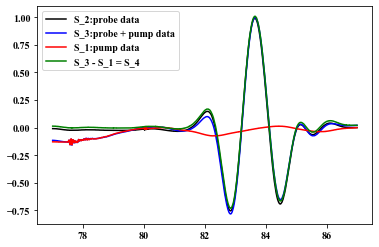

56
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr56.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp56.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu56.csv


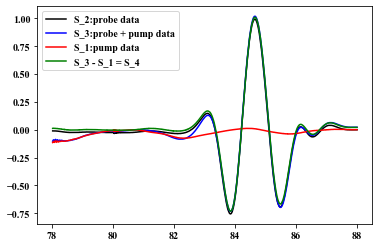

57
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr57.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp57.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu57.csv


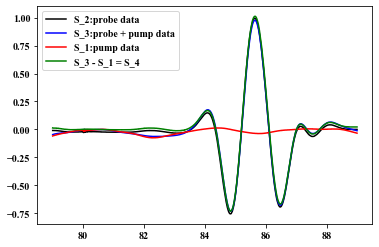

58
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr58.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp58.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu58.csv


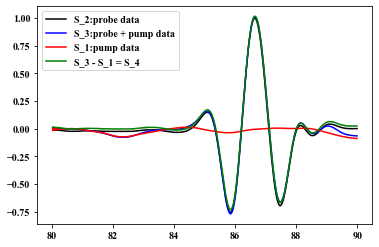

59
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr59.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp59.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu59.csv


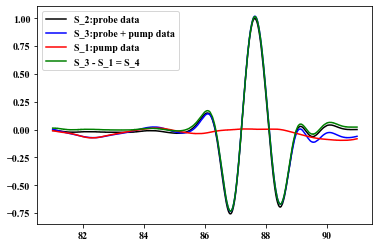

60
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr60.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp60.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu60.csv


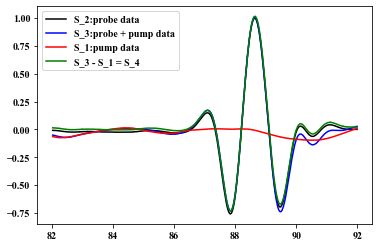

61
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr61.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp61.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu61.csv


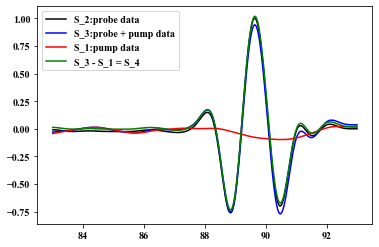

62
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr62.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp62.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu62.csv


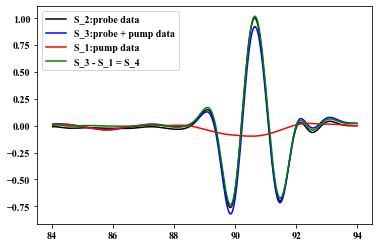

63
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr63.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp63.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu63.csv


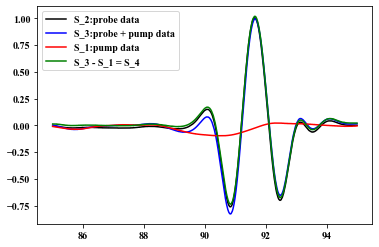

64
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr64.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp64.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu64.csv


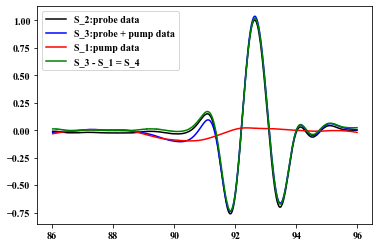

65
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr65.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp65.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu65.csv


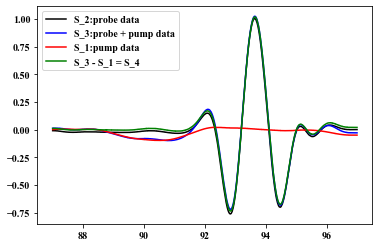

66
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr66.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp66.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu66.csv


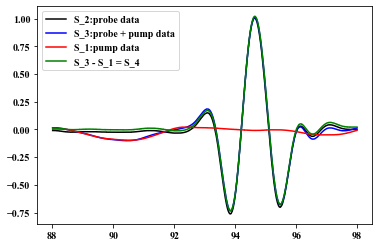

67
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr67.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp67.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu67.csv


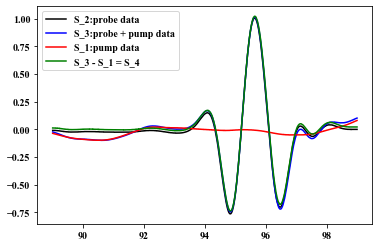

68
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr68.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp68.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu68.csv


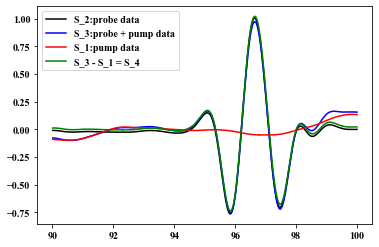

69
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr69.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp69.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu69.csv


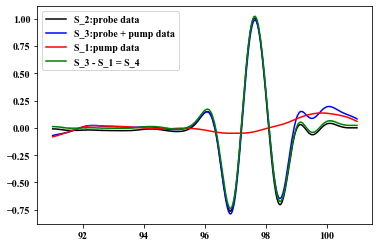

70
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr70.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp70.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu70.csv


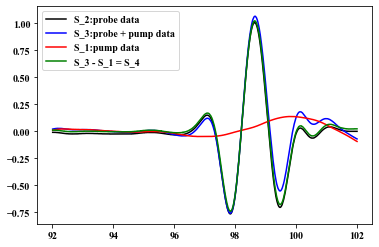

71
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr71.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp71.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu71.csv


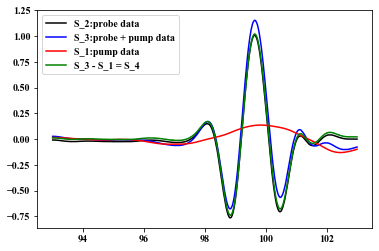

72
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr72.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp72.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu72.csv


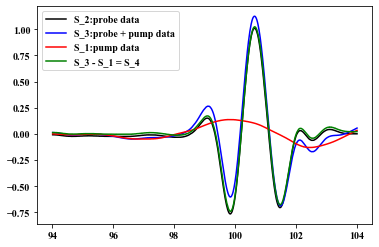

73
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr73.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp73.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu73.csv


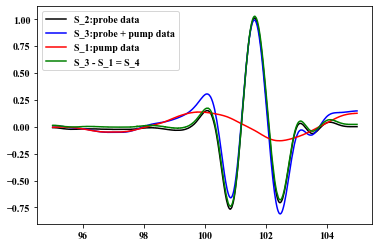

74
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr74.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp74.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu74.csv


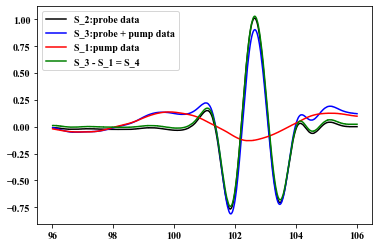

75
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr75.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp75.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu75.csv


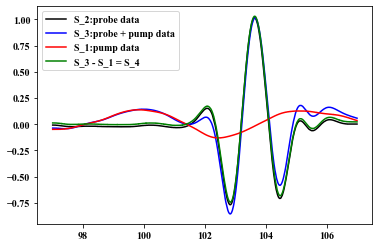

76
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr76.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp76.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu76.csv


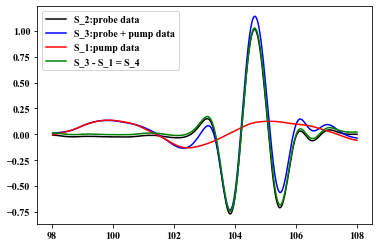

77
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr77.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp77.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu77.csv


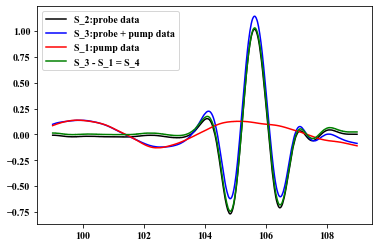

78
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr78.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp78.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu78.csv


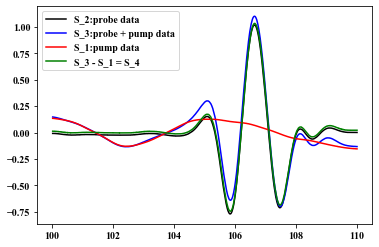

79
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr79.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp79.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu79.csv


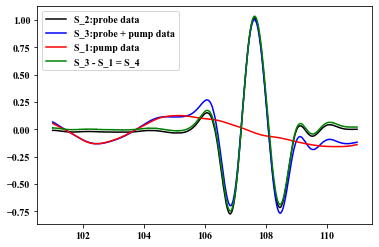

80
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr80.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp80.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu80.csv


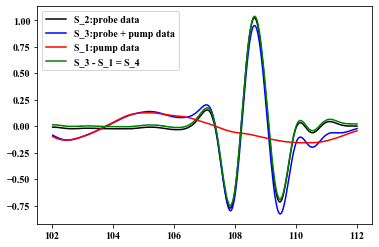

81
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr81.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp81.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu81.csv


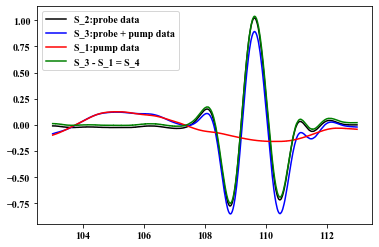

82
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr82.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp82.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu82.csv


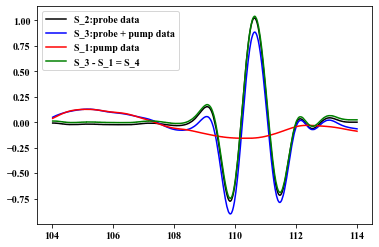

83
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr83.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp83.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu83.csv


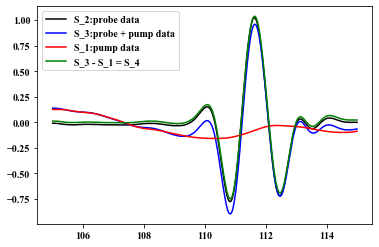

84
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr84.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp84.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu84.csv


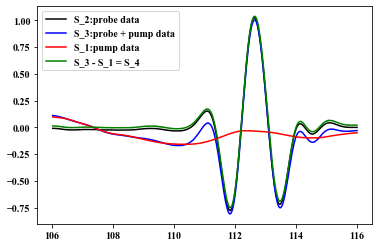

85
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr85.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp85.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu85.csv


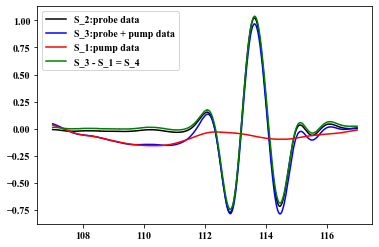

86
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr86.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp86.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu86.csv


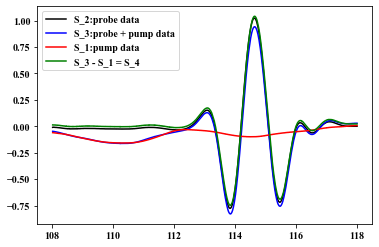

87
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr87.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp87.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu87.csv


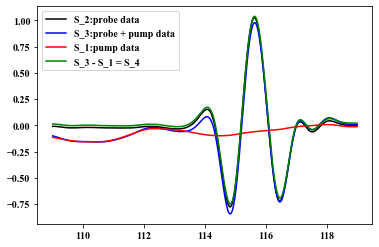

88
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr88.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp88.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu88.csv


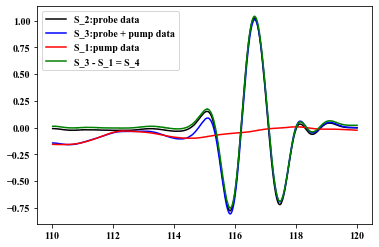

89
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr89.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp89.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu89.csv


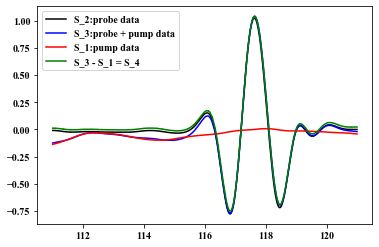

90
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr90.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp90.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu90.csv


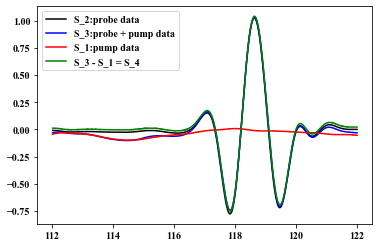

91
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr91.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp91.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu91.csv


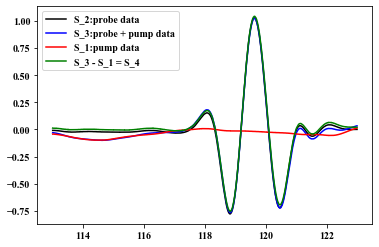

92
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr92.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp92.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu92.csv


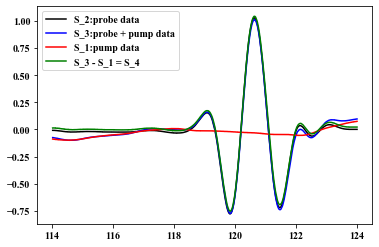

93
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr93.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp93.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu93.csv


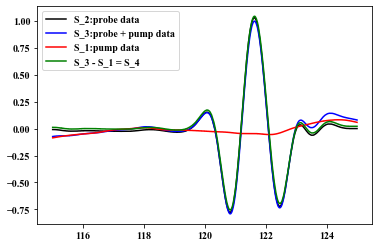

94
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr94.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp94.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu94.csv


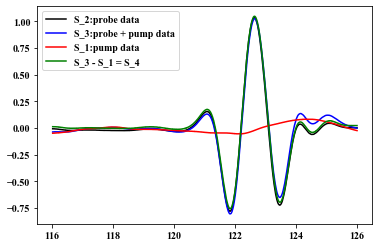

95
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr95.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp95.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu95.csv


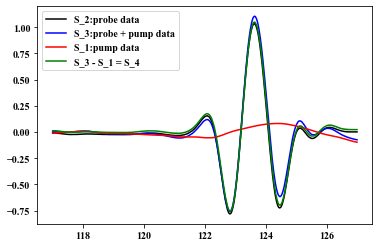

96
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr96.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp96.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu96.csv


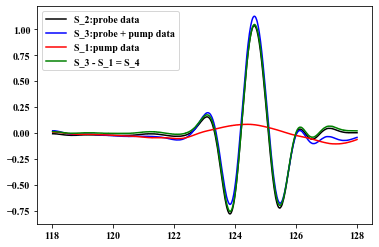

97
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr97.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp97.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu97.csv


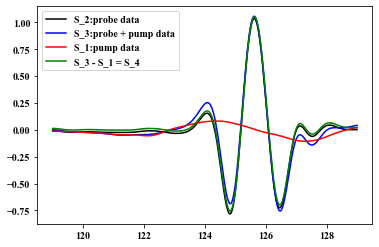

98
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr98.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp98.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu98.csv


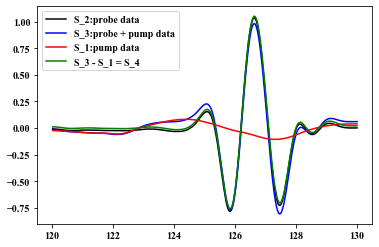

FileNotFoundError: [Errno 2] No such file or directory: 'c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V//0_RESULTS/Delays.png'

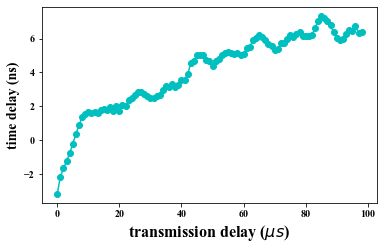

In [6]:
#for name in Folder_Name[1:3]:  #should start from 1 like:[1:]
name= FILE_NAME
path=pathbase+str(name)+'/'#+"/Removed_Lines/"
print_directory=path+"/0_RESULTS/"
#tshifts2=Compute_Filter_All_Delays(delayvec,delay_scale_fact,missing_data,delaystep,path,fname_part2,fnameend,
#                                    winlen,recompute,flipdelays=flipdelays)

delayvec = np.arange(start, stop, delaystep, dtype)

for timedelays in delayvec:
    print(timedelays)
    #timedelays= int(timedelays)
    timedelays= timedelays
    fname_root=path
    #print fname_root
    # probe: black signal
    prdat=timedata('prdat') 
    readlabdat(fname_root+"pr"+str(timedelays)+".csv",prdat)
    plt.plot(prdat.time*1e6,prdat.data,'k',label="S_2:probe data")
    
    
    #pump and probe: blue signal
    ppdat=timedata('ppdat')
    readlabdat(fname_root+"pp"+str(timedelays)+".csv",ppdat)
    plt.plot(ppdat.time*1e6,ppdat.data,'b',label="S_3:probe + pump data")
    
    
    # pump: red signal
    pudat=timedata('pudat')
    readlabdat(fname_root+"pu"+str(timedelays)+".csv",pudat)
    plt.plot(ppdat.time*1e6,pudat.data,'r',label="S_1:pump data")
    
    if timedelays == start:
        s_wave=[[ppdat.time*1e6],[pudat.data]]
    else:
        s_wave= np.concatenate((s_wave,[[ppdat.time*1e6],[pudat.data]]), axis=1)
      
    # (pump and probe signal) - pump: green signal 
    plt.plot(ppdat.time*1e6,ppdat.data-pudat.data,'g',label="S_3 - S_1 = S_4")
    #plt.xlim((0,300))
    
    plt.legend()
    plt.show()

missing_data=np.array([])#12,21,22,25,26,29,43])
fname_part2=''
fnameend='.csv'

winlen=60e-6  #window over which the cross-correlation is computed
recompute=1 #recompute=0: =1 will recompute the delays (e.g. to change the window length), and save them to 
#           disk (delays.txt) in the same directory as the data.  If this is set to 0 it will only compute the 
#           delays if it doesn't find the file delays.txt

tshifts2=shifts('tshifts2')
tshifts2=Compute_Filter_All_Delays(delayvec,delay_scale_fact,missing_data,delaystep,path,fname_part2,fnameend,
                                   winlen,recompute=recompute,dofilter=0)


plt.plot(tshifts2.delays,tshifts2.raw,'co') # actual
plt.plot(tshifts2.delays,tshifts2.remove_noise_wiggles,'c') # smothed
plt.xlabel('transmission delay ($\mu s$)',fontsize=16) 
plt.ylabel('time delay (ns)',fontsize=14)
#plt.legend('1',loc=10,fontsize=12)


plt.gcf().subplots_adjust(bottom=0.2) # make room for x-axis labels

figname='Delays.png'
plt.savefig(print_directory+figname,bbox_inches='tight',dpi=200)

aa = np.asarray(tshifts2.delays)
bb = np.asarray(tshifts2.raw)
cc = np.asarray(tshifts2.remove_noise_wiggles)
merged = np.concatenate(([[aa],[bb],[cc]]))
np.savetxt(print_directory+"Delays.csv",merged.T, delimiter=",")

#fig = plt.figure()

print(time.ctime())

## Plotting Individual Transmission Delays

In [7]:
def getDat(path, stage, timedelay):
    dat = timedata(stage)
    readlabdat(fname_root+stage+str(timedelay)+".csv",dat)
    
    return dat

In [8]:
getDelays= np.arange(0, 100, 1)
pr_getDelays = []
pp_getDelays = []
pu_getDelays = []
print(getDelays)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [9]:
for i in getDelays:
    prdat_i = getDat(path=path, stage='pr', timedelay=i)
    pr_getDelays.append(prdat_i)
    
    ppdat_i = getDat(path=path, stage='pp', timedelay=i)
    pp_getDelays.append(ppdat_i)
    
    pudat_i = getDat(path=path, stage='pu', timedelay=i)
    pu_getDelays.append(pudat_i)

c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr0.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp0.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu0.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr1.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp1.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu1.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr2.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp2.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu2.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr3.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp3.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/

c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr40.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp40.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu40.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr41.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp41.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu41.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr42.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp42.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu42.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr43.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp43.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Tr

c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr81.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp81.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu81.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr82.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp82.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu82.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr83.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp83.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pu83.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pr84.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/pp84.csv
c:/Users/Jacob/Nonlinearity/Data/NS5/Fracture/O2/2020-12-07_02/Tr

IndexError: index 3 is out of bounds for axis 0 with size 3

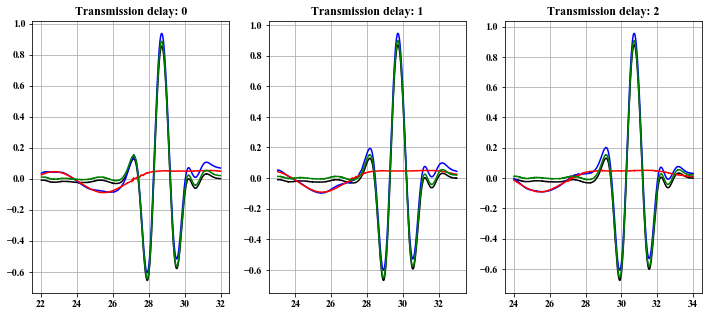

In [10]:
nrows = 1
fig, ax = plt.subplots(nrows,3, figsize = (12, 5))#, sharex=True, sharey=True)
j = 0
k = 0
if nrows == 1:
    for i in range(0, len(getDelays)):
        ax[k].set_title('Transmission delay: '+ str(getDelays[i]))
        ax[k].plot(pr_getDelays[i].time*1e6,pr_getDelays[i].data,'k',label="S_2:probe data")
        ax[k].plot(pp_getDelays[i].time*1e6,pp_getDelays[i].data,'b',label="S_3:probe + pump data")
        ax[k].plot(pp_getDelays[i].time*1e6,pu_getDelays[i].data,'r',label="S_1:pump data")
        ax[k].plot(pp_getDelays[i].time*1e6,pp_getDelays[i].data-pu_getDelays[i].data,'g',label="S_3 - S_1 = S_4")
        ax[k].grid()
        k = k+1
else:
    for i in range(0, len(getDelays)):
        print(j, k)
        ax[j,k].set_title('Transmission delay: '+ str(getDelays[i]))
        ax[j,k].plot(pr_getDelays[i].time*1e6,pr_getDelays[i].data,'k',label="S_2:probe data")
        ax[j,k].plot(pp_getDelays[i].time*1e6,pp_getDelays[i].data,'b',label="S_3:probe + pump data")
        ax[j,k].plot(pp_getDelays[i].time*1e6,pu_getDelays[i].data,'r',label="S_1:pump data")
        ax[j,k].plot(pp_getDelays[i].time*1e6,pp_getDelays[i].data-pu_getDelays[i].data,'g',label="S_3 - S_1 = S_4")
        ax[j,k].grid()
        k = k+1
        if k > 3:
            j = j+1
            k = 0
        elif j > 1:
            j = j
        else:
            j = j
            k = k
            
plt.tight_layout()
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

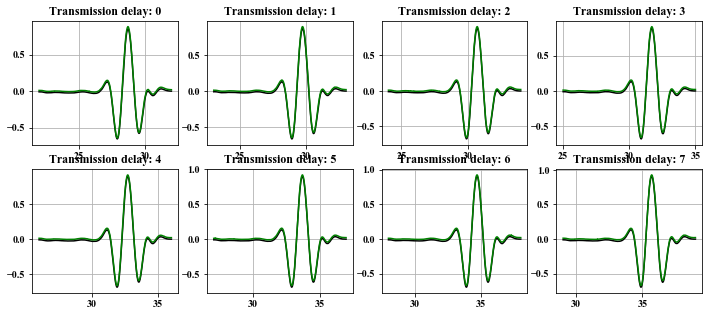

In [11]:
fig, ax = plt.subplots(2,4, figsize = (12, 5))#, sharex=True, sharey=True)
j = 0
k = 0
for i in range(0, len(getDelays)):
#     print(j, k)
    ax[j,k].set_title('Transmission delay: '+ str(getDelays[i]))
    ax[j,k].plot(pr_getDelays[i].time*1e6,pr_getDelays[i].data,'k',label="S_2:probe data")
    ax[j,k].plot(pp_getDelays[i].time*1e6,pp_getDelays[i].data-pu_getDelays[i].data,'g',label="S_3 - S_1 = S_4")
    ax[j,k].grid()
    k = k+1
    if k > 3:
        j = j+1
        k = 0
    elif j > 1:
        j = j
    else:
        j = j
        k = k

plt.tight_layout()
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize = (12,6))

# The data.
ax1.plot(tshifts2.delays, tshifts2.raw, 'rv-', markersize=8, markeredgecolor='k')


ax1.set_xlabel('Transmission delay ($\mu s$)',fontsize=16)
ax1.set_ylabel('Time delay (ns)',fontsize=16)
ax1.set_title('COS Sample A; O1', fontsize=20)
ax1.set_ylim(0,13)
plt.grid()
# Create a set of inset Axes: these should fill the bounding box allocated to
# them.
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.05,0.55,0.4,0.4])
ax2.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 and draw lines
# in grey linking the two axes.
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.5')
mark_inset(ax1, ax2, loc1=1, loc2=3, fc="none", ec='0.5')
# The data: only display for low temperature in the inset figure.

ax2.plot(tshifts2.delays[73:81], tshifts2.raw[73:81], 'rv-', markeredgecolor='k')
#ax2.set_yticks(np.arange(-1,4,1))
#ax2.set_ylim(-1,4)
plt.grid()
plt.show()

## Filtering

In [ ]:
# First, design the Buterworth filter
N  = 2    # Filter order
Wn = 0.3 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
 
# Second, apply the filter
delays_filtered = signal.filtfilt(B,A, tshifts2.remove_noise_wiggles)

In [ ]:
plt.figure(figsize = (14,8))
# plt.plot(tshifts2.delays,tshifts2.remove_noise_wiggles,'c', label = 'Smoothed', \
#          color = 'r') # smoothed
plt.plot(tshifts2.delays,delays_filtered,'c', label = 'Smoothed', \
         color = 'r') # smoothed
plt.xlabel('Transmission delay ($\mu s$)',fontsize=16)
plt.ylabel('Time delay (ns)',fontsize=16)
plt.title('COS Sample A; O2', fontsize=20)
#plt.savefig('Sample_A-2020-07-27.PNG', pad_inches=0.1, bbox_inches='tight')
#plt.text(80, -0.5, "Run 1", fontsize=20)
plt.grid()
plt.legend(fontsize=12)
plt.show()

## Loading Time Delay Data From Disk

In [ ]:
# tshifts2.raw = np.loadtxt('C:/Users/Jacob/Nonlinearity/Data/NS5/Initial/O1/2020-11-25/raw.txt')
# tshifts2.delays = np.loadtxt('C:/Users/Jacob/Nonlinearity/Data/NS5/Initial/O1/2020-11-25/delays.txt')
# tshifts2.trend = np.loadtxt('C:/Users/Jacob/Nonlinearity/Data/NS5/Initial/O1/2020-11-25/trend.txt')
# tshifts2.wiggles = np.loadtxt('C:/Users/Jacob/Nonlinearity/Data/NS5/Initial/O1/2020-11-25/wiggles.txt')
# tshifts2.remove_noise = np.loadtxt('C:/Users/Jacob/Nonlinearity/Data/NS5/Initial/O1/2020-11-25/removed_noise.txt')
# tshifts2.remove_noise_wiggles = tshifts2.raw

## Plotting Multiple Time Delay Experiments

In [ ]:
NS6_raw_I_O1 = tshifts2.raw
NS6_delays_I_O1 = tshifts2.delays
NS6_remove_noise_wiggles_I_O1 = tshifts2.remove_noise_wiggles

In [ ]:
NS5_raw_I_O2 = tshifts2.raw
NS5_delays_I_O2 = tshifts2.delays
NS5_remove_noise_wiggles_I_O2 = tshifts2.remove_noise_wiggles

In [ ]:
Cement_wt_sand_raw_Run1_O2 = tshifts2.raw
Cement_wt_sand_delays_Run1_O2 = tshifts2.delays
Cement_wt_sand_remove_noise_wiggles_Run1_O2 = tshifts2.remove_noise_wiggles

In [ ]:
Cement_wt_sand_raw_Run2_O2 = tshifts2.raw
Cement_wt_sand_delays_Run2_O2 = tshifts2.delays
Cement_wt_sand_remove_noise_wiggles_Run2_O2 = tshifts2.remove_noise_wiggles

In [ ]:
Cement_wt_sand_raw_Run3_O2 = tshifts2.raw
Cement_wt_sand_delays_Run3_O2 = tshifts2.delays
Cement_wt_sand_remove_noise_wiggles_Run3_O2 = tshifts2.remove_noise_wiggles

In [ ]:
Cement_wt_sand_raw_Run4_O2 = tshifts2.raw
Cement_wt_sand_delays_Run4_O2 = tshifts2.delays
Cement_wt_sand_remove_noise_wiggles_Run4_O2 = tshifts2.remove_noise_wiggles

In [ ]:
sum1 = np.add(Cement_wt_sand_remove_noise_wiggles_Run1_O2, Cement_wt_sand_remove_noise_wiggles_Run2_O2)
sum2 = np.add(sum1, Cement_wt_sand_remove_noise_wiggles_Run3_O2)
sum3 = np.add(sum2, Cement_wt_sand_remove_noise_wiggles_Run4_O2)
denom = np.ones(len(Cement_wt_sand_remove_noise_wiggles_Run4_O2))
denom = denom*4
av = np.divide(sum3, denom)

In [ ]:
plt.figure(figsize = (14,8))

#plt.plot(Cement_delays_Run1_O1,Cement_raw_Run1_O1,'co', label = 'Run 1 Raw', color = 'black') # actual
plt.plot(Cement_wt_sand_delays_Run1_O2,Cement_wt_sand_remove_noise_wiggles_Run1_O2,'c', label = 'Run 1', \
         color = 'r', alpha = 0.5) # smoothed
plt.plot(Cement_wt_sand_delays_Run2_O2,Cement_wt_sand_remove_noise_wiggles_Run2_O2,'c', label = 'Run 2', \
         color = 'g', alpha = 0.5) # smoothed
plt.plot(Cement_wt_sand_delays_Run3_O2,Cement_wt_sand_remove_noise_wiggles_Run3_O2,'c', label = 'Run 3', \
         color = 'navy', alpha = 0.5) # smoothed
plt.plot(Cement_wt_sand_delays_Run4_O2,Cement_wt_sand_remove_noise_wiggles_Run4_O2,'c', label = 'Run 4', \
         color = 'orange', alpha = 0.5) # smoothed
# plt.plot(NS6_delays_I_O1,NS6_remove_noise_wiggles_I_O1,'c', label = 'Sandstone Sample', \
#          color = 'c') # smoothed
plt.plot(Cement_wt_sand_delays_Run1_O2,av,'c', label = 'Average', \
         color = 'red') # smoothed

#plt.ylim(-4, 4)
plt.xlabel('Transmission delay ($\mu s$)',fontsize=16)
plt.xticks(np.arange(0,100,10))
plt.ylabel('Time delay (ns)',fontsize=16)
plt.title('Cement Sample wt Sand Layer; O2', fontsize=20)
# plt.title('Cement Sample wt Wires; O1', fontsize=20)
#plt.savefig('Sample_A-2020-07-27.PNG', pad_inches=0.1, bbox_inches='tight')
#plt.text(80, -0.5, "Run 1", fontsize=20)
plt.grid()
plt.legend(fontsize=12)
plt.show()

## Plotting Single Time Delay Experiment

In [ ]:
plt.figure(figsize = (14,8))
plt.plot(tshifts2.delays,tshifts2.raw,'co', label = 'Raw', color = 'black') # actual
plt.plot(tshifts2.delays,tshifts2.remove_noise_wiggles,'c', label = 'Smoothed', \
         color = 'r') # smoothed
plt.xlabel('Transmission delay ($\mu s$)',fontsize=16)
plt.xticks(np.arange(-68,150,10))
plt.ylabel('Time delay (ns)',fontsize=16)
plt.title('COS Sample A; O2', fontsize=20)
#plt.savefig('Sample_A-2020-07-27.PNG', pad_inches=0.1, bbox_inches='tight')
#plt.text(80, -0.5, "Run 1", fontsize=20)
plt.grid()
plt.legend(fontsize=12)
plt.show()

## Plotting Single Time Delay Experiment With Inset

In [ ]:
fig, ax1 = plt.subplots(figsize = (14,8))

# The data.
ax1.plot(tshifts2.delays, tshifts2.raw, 'rv-', markersize=8, markeredgecolor='k')


ax1.set_xlabel('Transmission delay ($\mu s$)',fontsize=16)
ax1.set_ylabel('Time delay (ns)',fontsize=16)
ax1.set_title('COS Sample A; O2', fontsize=20)
plt.grid()
# Create a set of inset Axes: these should fill the bounding box allocated to
# them.
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.45,0.4,0.5,0.5])
ax2.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 and draw lines
# in grey linking the two axes.
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.5')
mark_inset(ax1, ax2, loc1=1, loc2=3, fc="none", ec='0.5')
# The data: only display for low temperature in the inset figure.

ax2.plot(tshifts2.delays[56:], tshifts2.raw[56:], 'rv-', markeredgecolor='k')
ax2.set_yticks(np.arange(-1,4,1))
ax2.set_ylim(-1,4)
plt.grid()
plt.show()

In [ ]:
name = Folder_Name[1]
print("name is", name)
path=pathbase+str(name)+"/"
print_directory=path+"/0_Results/"

fig = plt.figure()
delayvec=np.arange(0,stop,delaystep)

def updatefig(i):
    fig.clear()
    plt.axes(xlim=(start,stop),ylim=(-0.15,0.15)) 

    #timedelays= int(aa[i])
    fname_root=path

    prdat=timedata('prdat')  #probe
    readlabdat(fname_root+"pr"+str(int(delayvec[i]))+".csv",prdat)

    ppdat=timedata('ppdat')  #pump + probe
    readlabdat(fname_root+"pp"+str(int(delayvec[i]))+".csv",ppdat)   

    pudat_start1=timedata('pudat') # pump
    readlabdat(fname_root+"pu"+str(30)+".csv",pudat_start1)

    pudat_start2=timedata('pudat') # pump
    readlabdat(fname_root+"pu"+str(70)+".csv",pudat_start2)

    #pudat_start3=timedata('pudat') # pump
    #readlabdat(fname_root+"pu"+str(66)+".csv",pudat_start3)

    #pudat_start4=timedata('pudat') # pump
    #readlabdat(fname_root+"pu"+str(76)+".csv",pudat_start3)

    pudat=timedata('pudat') # pump
    readlabdat(fname_root+"pu"+str(int(delayvec[i]))+".csv",pudat)

    plt.plot(prdat.time*1e6,prdat.data,'k',label="S_1:prob data")
    plt.plot(pudat_start1.time*1e6,pudat_start1.data,'r',label="S_1:pump data")
    plt.plot(pudat_start2.time*1e6,pudat_start2.data,'r')
    #plt.plot(pudat_start3.time*1e6,pudat_start3.data,'r',label="S_1:pump data")
    plt.plot(ppdat.time*1e6,ppdat.data,'b',label="S_3:probe + pump data")
    plt.plot(ppdat.time*1e6,ppdat.data-pudat.data,'g',label="S_3 - S_1 = S_4")

    plt.draw()    
    plt.legend(loc=1,fontsize=6)


anim = animation.FuncAnimation(fig, updatefig, shape(delayvec)[0]) #,shape(delayvec1)[0]) #shape(aa)[0])
writergif = animation.PillowWriter(fps=30)
anim.save(print_directory+'filename.gif',writer=writergif)
#anim.save(print_directory+"Movie.mp4", codec='mpeg4', fps=15, dpi=500)



In [ ]:
#color_code=['r','b','g','y','c']
#color_counter=0

for name in Folder_Name[2:2]: #[1:6][6:11] [11:16] [16:21] [21:26][26:31] [31:36]
    
    #if color_counter==5:
        #color_counter=0
    
    Graph_name = name[3:6] #3:6
    Legend_name = name[3:12]    
    
    path=pathbase+str(name)+"/"
    print_directory=path+"/0_Results/"
    
    c1=[]
    c2=[]
    c3=[]
    with open(print_directory+'Delays.csv', 'rb') as csvfile:
        spamreader = csv.reader(csvfile)
        for row in spamreader:
            c1.append(row[0])
            c2.append(row[1])
            c3.append(row[2])
    
    c1_array=np.array(c1)
    c1_array_float=c1_array.astype(np.float)
    c2_array=np.array(c2)
    c2_array_float=c2_array.astype(np.float)
    c3_array=np.array(c3)
    c3_array_float=c3_array.astype(np.float)
    
    #plt.plot(c1_array_float,c2_array_float,str(color_code[color_counter]))
    #plt.plot(c1_array_float,c3_array_float,str(color_code[color_counter]),label=str(Legend_name))
    plt.plot(c1_array_float,c3_array_float,label=str(Legend_name))
    plt.xlabel('Transmission delay ($\mu s$)',fontsize=16) 
    plt.ylabel('Time delay (ns)',fontsize=16)
    plt.legend(loc=2,fontsize=5)
    #plt.ylim((35,45))
    #color_counter=color_counter+1
    
        
figname='Delays_All.png'#+str(Graph_name)+'V.png'
plt.savefig(pathbase+figname,bbox_inches='tight',dpi=500)

## Haupert 2020 Fig 13.1 Recreation

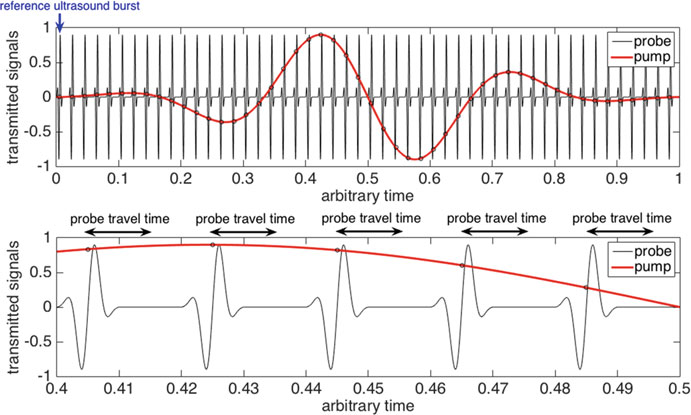

In [12]:
pump_sig = np.loadtxt(pathbase+'10.0V/pump_sig.txt')

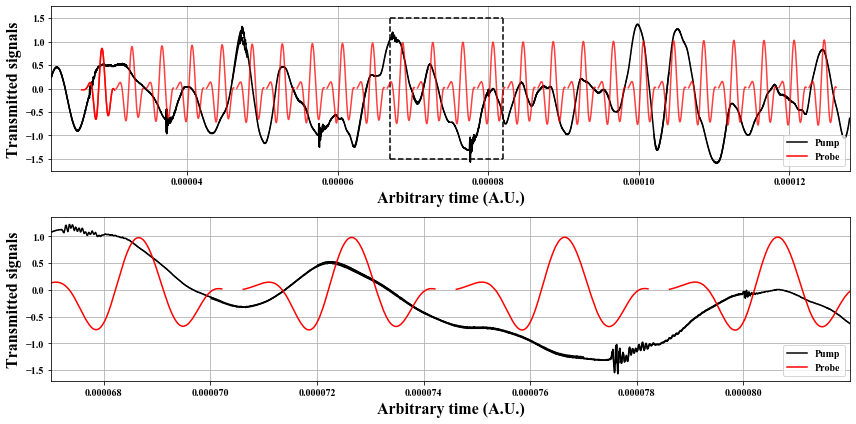

In [115]:
nrows = 2
ncols = 1
fig, ax = plt.subplots(nrows, ncols, figsize = (12, 6))

# Upper plot main data.
for i in getDelays[::8]:
    ax[0].plot(pp_getDelays[i].time,pu_getDelays[i].data*10,'k')
for i in getDelays[::4]:
    ax[0].plot(pr_getDelays[i].time[1150:][:900],pr_getDelays[i].data[1150:][:900],'r', alpha = 0.75)

# Upper data for legend.   
ax[0].plot(pp_getDelays[0].time,pu_getDelays[0].data*10,'k',label="Pump")
ax[0].plot(pr_getDelays[0].time[1000:][:1100],pr_getDelays[0].data[1000:][:1100],'r',label="Probe")

# Ploting inset highlights.
ax[0].vlines(min(pp_getDelays[45].time), -1.5, 1.5, LineStyle='--')
ax[0].vlines(max(pp_getDelays[50].time), -1.5, 1.5, LineStyle='--')
ax[0].hlines(1.5, min(pp_getDelays[45].time), max(pp_getDelays[50].time), LineStyle='--')
ax[0].hlines(-1.5, min(pp_getDelays[45].time), max(pp_getDelays[50].time), LineStyle='--')

# Lower plot main data.
for i in [getDelays[45],getDelays[48], getDelays[50]]:
    ax[1].plot(pp_getDelays[i].time,pu_getDelays[i].data*10,'k')

for i in [getDelays[40], getDelays[44], getDelays[48], getDelays[52]] :
    ax[1].plot(pr_getDelays[i].time[1150:][:900],pr_getDelays[i].data[1150:][:900],'r')

# Lower data for legend.
ax[1].plot(pp_getDelays[0].time,pu_getDelays[0].data*10,'k',label="Pump")
ax[1].plot(pr_getDelays[0].time[1200:][:1200],pr_getDelays[0].data[1000:][:1200],'r',label="Probe")

# Things for both plots.
[ax[i].set_xlabel('Arbitrary time (A.U.)', fontsize=16) for i in np.arange(0, nrows,1)]
[ax[i].set_ylabel('Transmitted signals', fontsize=16) for i in np.arange(0, nrows,1)]
[ax[i].grid() for i in np.arange(0, nrows,1)]
[ax[i].legend(loc='lower right') for i in np.arange(0, nrows,1)]

# Limits.
ax[0].set_xlim(min(pp_getDelays[0].time), max(pp_getDelays[max(getDelays)-3].time))
ax[1].set_xlim(min(pp_getDelays[45].time), max(pp_getDelays[50].time))
ax[0].set_ylim(-1.75, 1.75)
plt.tight_layout()
plt.show()

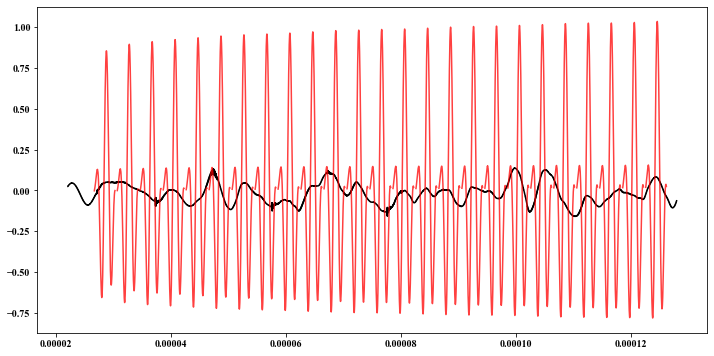

In [122]:
plt.figure(figsize = (12, 6))
for i in getDelays[::8]:
    plt.plot(pp_getDelays[i].time, pu_getDelays[i].data, 'k')
for i in getDelays[::4]:
    plt.plot(pr_getDelays[i].time[1150:][:900], pr_getDelays[i].data[1150:][:900], 'r',  alpha = 0.75) 

In [ ]:
all_pump = []
for i in getDelays:
    all_pump.append(pu_getDelays[i].data)
all_pump = np.concatenate(all_pump, axis=0)

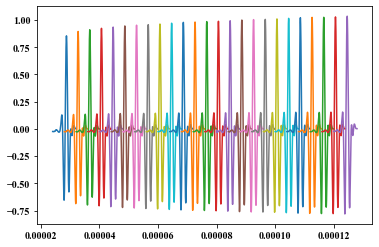

In [112]:
for i in getDelays[::4]:
    plt.plot(pr_getDelays[i].time[500:][:2000],pr_getDelays[i].data[500:][:2000])

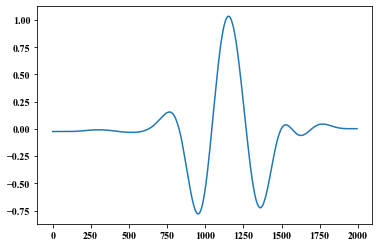

In [113]:
plt.plot(pr_getDelays[i].data[500:][:2000])

In [ ]:
np.pad(A, (2, 3), 'constant')
# array([0, 0, 1, 2, 3, 4, 5, 0, 0, 0])

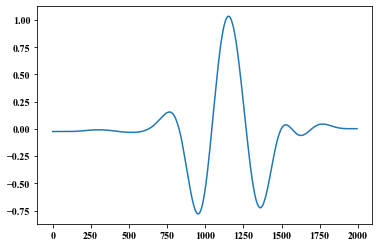

In [111]:
plt.plot(pr_getDelays[i].data[500:][:2000])

In [58]:
all_pump = []
for i in getDelays:
    all_pump.append(pu_getDelays[i].data)
all_pump = np.concatenate(all_pump, axis=0)   

In [59]:
print(np.shape(all_pump[::100]))
# plt.plot(all_pump)

(2496,)


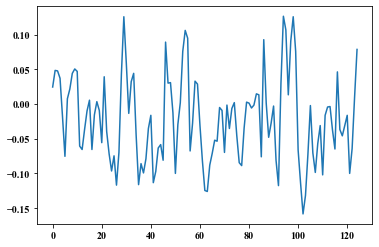

In [61]:
plt.plot(all_pump[::2000])